광진구 주정차단속데이터 분석

In [2]:
import pandas as pd
df1 = pd.read_csv('광진구_공영주차장3.csv', encoding='UTF8') #공영주차장의 위치 데이터

In [3]:
df_pp = df1[['동명','위도','경도','시설명']] #주차장 형태,요금 등 상세 정보를 제외

In [4]:
df_pp.head(20) #광진구 공영주차장

,동명,위도,경도,시설명
0,중곡2동,37.560348,127.085753,장신구
1,중곡2동,37.556301,127.084047,중곡동복개천
2,중곡3동,37.569368,127.084663,중곡3동마을공원
3,중곡3동,37.566771,127.083415,중곡체육센터
4,중곡4동,37.559053,127.089412,신성시장길
5,중곡4동,37.559053,127.089412,새오름
6,중곡4동,37.559053,127.089412,용마산남
7,중곡4동,37.559053,127.089412,긴고랑길공영
8,중곡4동,37.559053,127.089412,해오름
9,중곡4동,37.559053,127.089412,뻥튀기골주차장(용마공원주차장)


In [5]:
df_pp.value_counts('동명')

동명
중곡4동    8
광장동     3
구의2동    3
구의3동    3
화양동     3
구의1동    2
군자동     2
능동      2
자양4동    2
중곡2동    2
중곡3동    2
자양1동    1
자양2동    1
자양3동    1
dtype: int64

In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum #나눔고딕 설치과정

In [9]:
import matplotlib.pyplot as plt #나눔 고딕 설정 과정
from matplotlib import font_manager

# 나눔고딕 폰트 설치 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 나눔고딕 폰트 추가
font_manager.fontManager.addfont(font_path)

# 폰트 캐시 업데이트
plt.rcParams['font.family'] = 'NanumGothic'

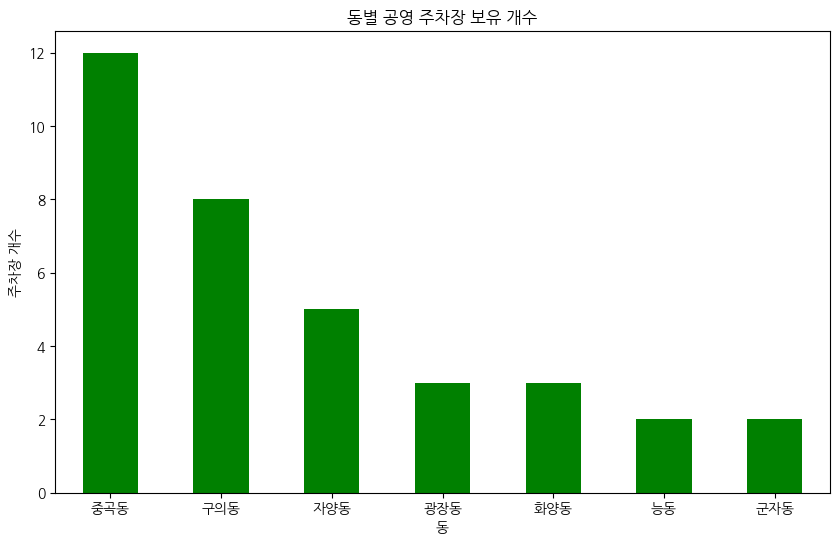

In [45]:
df_pp_count = df_pp['동명'].replace(['중곡4동', '중곡2동', '중곡3동'], '중곡동').replace(['구의1동', '구의2동', '구의3동'], '구의동').replace(
    ['자양1동', '자양2동', '자양3동', '자양4동'], '자양동')
#상세동 구분을 없앰.
pp_dong = df_pp_count.value_counts()


# 막대그래프 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
pp_dong.plot(kind='bar',color = 'green')
plt.title('동별 공영 주차장 보유 개수')
plt.xlabel('동')
plt.ylabel('주차장 개수')
plt.xticks(rotation=0)
plt.show()

In [11]:
df2 = pd.read_csv('광진구_주정차단속.csv',encoding='cp949') # 주정차 단속내역 데이터

In [12]:
df_crackdown = df2[['단속지역','단속장소','단속구분']] # 광진구 주차단속 내역

In [13]:
df_crackdown.head(10)

,단속지역,단속장소,단속구분
0,화양동,119-4,PDA
1,화양동,건대입구1번출구,CCTV
2,구의동,동서울터미널 주차장,CCTV
3,화양동,건대입구1번출구,CCTV
4,화양동,건대입구1번출구,CCTV
5,화양동,건대입구1번출구,CCTV
6,구의동,동서울터미널 주차장,CCTV
7,구의동,리젠트오피스텔,CCTV
8,구의동,동서울터미널 주차장,CCTV
9,구의동,강변역1번출구,CCTV


In [15]:
df_crackdown.value_counts('단속지역').head(15)

단속지역
구의동      119364
자양동       95549
중곡동       83843
화양동       51434
광장동       46572
군자동       35612
능동        16350
아차산로       5827
능동로        4058
능  동       2636
광나루로       2088
영화사로       1925
자양로        1516
자양번영로      1472
군자로        1434
dtype: int64

In [14]:
df_crackdown.value_counts('단속지역').head(7)

단속지역
구의동    119364
자양동     95549
중곡동     83843
화양동     51434
광장동     46572
군자동     35612
능동      16350
dtype: int64

In [16]:
df_crackdown.value_counts('단속구분')

단속구분
PDA           209243
CCTV          139038
고정형CCTV        66536
주행형CCTV        56377
스마트앱(서울시)      15370
안전신문고(행안부)     11771
생활불편앱(행안부)      4835
버스장착형CCTV         52
일반                39
시민신고제웹            28
소방서                8
경찰서                3
dtype: int64

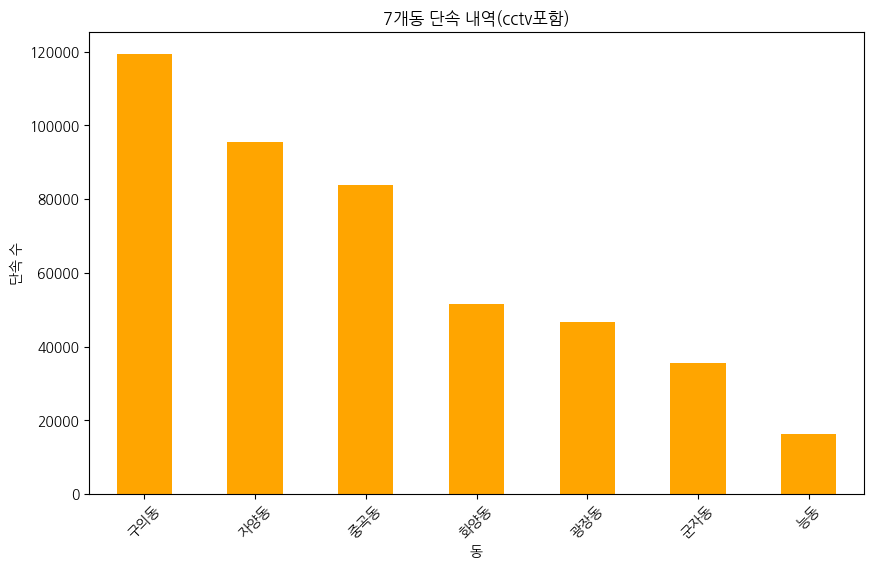

In [61]:
crackdown_counts_C = df_crackdown['단속지역'].value_counts().head(7)
plt.figure(figsize=(10, 6))
crackdown_counts_C.plot(kind='bar',color='orange')
plt.title('7개동 단속 내역(cctv포함)')
plt.xlabel('동')
plt.ylabel('단속 수')
plt.xticks(rotation=45)
plt.show()


In [52]:
excluded_types = ['CCTV', '고정형CCTV','주행형CCTV','버스장착형CCTV'] # CCTV방식의 단속방식을 제외한 나머지 단속방식의 '동명'별 단속내역 value_counts를 구하기 위함.
crackdown_counts_notC = df_crackdown[~df_crackdown['단속구분'].isin(excluded_types)]['단속지역'].value_counts()

In [53]:
crackdown_counts_notC.head(7)

자양동    45785
구의동    43213
중곡동    32262
광장동    22049
화양동    20876
군자동    16029
능동      8259
Name: 단속지역, dtype: int64

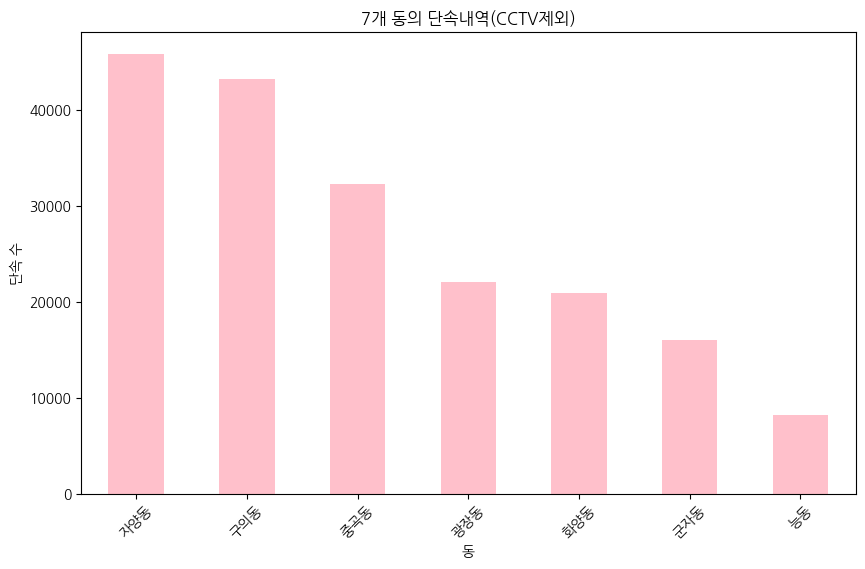

In [54]:
# 상위 7개 지역까지만 선택
top_7_areas = crackdown_counts_notC.head(7)

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
top_7_areas.plot(kind='bar', color='pink')
plt.title('7개 동의 단속내역(CCTV제외)')
plt.xlabel('동')
plt.ylabel('단속 수')
plt.xticks(rotation=45)
plt.show()

In [18]:
df3 = pd.read_csv('광진구_CCTV.csv',encoding='euc-kr') #광진구 고정형 cctv데이터

In [20]:
df3.head(10)

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,서울 광진구 광장동 334-2,37.547790,127.106990,광진구,모두투어앞,불법주정차구역
1,서울 광진구 광장동 445-3,37.543799,127.102410,광진구,광현교회 앞,불법주정차구역
2,서울 광진구 구의동 135,37.549593,127.081780,광진구,아차산역 5번출구 앞,불법주정차구역
3,서울 광진구 군자동 503,37.548609,127.071072,광진구,두산위브 앞,불법주정차구역
4,서울 광진구 구의동 66-62,37.545348,127.088420,광진구,국민은행 앞,불법주정차구역
5,서울 광진구 구의동 68-29,37.545976,127.086327,광진구,구의사거리,불법주정차구역
6,서울 광진구 구의동 546-1,37.533558,127.093389,광진구,리젠트오피스텔건너편,불법주정차구역
7,서울 광진구 구의동 546-11,37.535562,127.093359,광진구,지너스타워 주차장 앞,불법주정차구역
8,서울 광진구 구의동 611,37.538347,127.096620,광진구,현대2단지아파트 앞,불법주정차구역
9,서울 광진구 구의동 546-6,37.535668,127.094522,광진구,강변역 1번 출구,불법주정차구역


In [21]:
df_CCTV = df3[['고정형CCTV지번주소','위도','경도','단속지점명']]

In [ ]:
df_CCTV['고정형CCTV지번주소'] = df_CCTV['고정형CCTV지번주소'].str.replace('.*광장.*', '광장동')
df_CCTV['고정형CCTV지번주소'] = df_CCTV['고정형CCTV지번주소'].str.replace('.*구의.*', '구의동')
df_CCTV['고정형CCTV지번주소'] = df_CCTV['고정형CCTV지번주소'].str.replace('.*능동.*', '능동')
df_CCTV['고정형CCTV지번주소'] = df_CCTV['고정형CCTV지번주소'].str.replace('.*자양.*', '자양동')
df_CCTV['고정형CCTV지번주소'] = df_CCTV['고정형CCTV지번주소'].str.replace('.*군자.*', '군자동') 
df_CCTV['고정형CCTV지번주소'] = df_CCTV['고정형CCTV지번주소'].str.replace('.*중곡.*', '중곡동')
df_CCTV['고정형CCTV지번주소'] = df_CCTV['고정형CCTV지번주소'].str.replace('.*화양.*', '화양동')    


In [24]:
df_CCTV.head(10)

,고정형CCTV지번주소,위도,경도,단속지점명
0,광장동,37.547790,127.106990,모두투어앞
1,광장동,37.543799,127.102410,광현교회 앞
2,구의동,37.549593,127.081780,아차산역 5번출구 앞
3,군자동,37.548609,127.071072,두산위브 앞
4,구의동,37.545348,127.088420,국민은행 앞
5,구의동,37.545976,127.086327,구의사거리
6,구의동,37.533558,127.093389,리젠트오피스텔건너편
7,구의동,37.535562,127.093359,지너스타워 주차장 앞
8,구의동,37.538347,127.096620,현대2단지아파트 앞
9,구의동,37.535668,127.094522,강변역 1번 출구


In [40]:
df_CCTV.value_counts("고정형CCTV지번주소")

고정형CCTV지번주소
구의동    14
중곡동    11
자양동     9
군자동     7
화양동     5
능동      4
광장동     3
dtype: int64

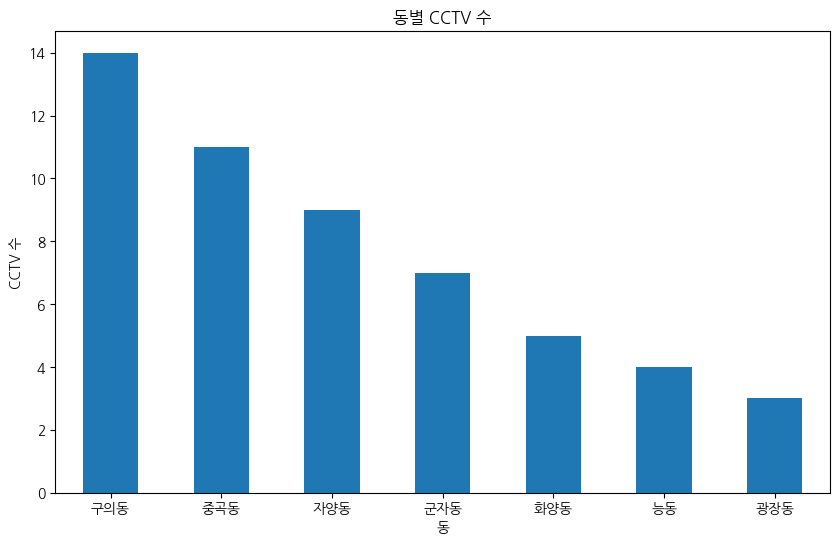

In [44]:
import matplotlib.pyplot as plt

cctv_counts = df_CCTV['고정형CCTV지번주소'].value_counts()

plt.figure(figsize=(10, 6))
cctv_counts.plot(kind='bar')
plt.title('동별 CCTV 수')
plt.xlabel('동')
plt.ylabel('CCTV 수')
plt.xticks(rotation=0)
plt.show()

광진구CCTV, 주차장 위도,경도를 이용한 마킹

※단속내역의 위도 경도 변환 어려움으로 인한 마킹 제외.





In [25]:
import folium
m = folium.Map(location=[37.546730 #광진구의 중심좌표
,127.085756],  
               zoom_start=13.5)


latitude = df_CCTV["위도"]
longitude = df_CCTV["경도"]

latitude1 = df_pp["위도"]
longitude2 = df_pp["경도"]



# 원형 마커를 생성하고 맵에 추가
for lat, lon in zip(latitude, longitude):
    folium.CircleMarker([lat, lon], radius=5, color='blue', fill_color='blue').add_to(m) #고정형 cctv마킹(파란색)
for lat, lon in zip(latitude1, longitude2):
    folium.CircleMarker([lat, lon], radius=5, color='green', fill_color='green').add_to(m) #공영주차장 위치(초록색)
m

상관관계 분석

(CCTV&단속내역&주차장수)

In [47]:
# 각 동별 주정차 단속 횟수 계산
crackdown_counts1 = df_crackdown['단속지역'].value_counts().head(7) #CCTV로 인한 단속내역도 포함

# 각 동별 주차장 수 계산
pp_counts = df_pp['동명'].value_counts()

# 각 지역별 CCTV 수 계산
cctv_counts = df_CCTV['고정형CCTV지번주소'].value_counts()

# 데이터프레임 생성
df_analysis = pd.DataFrame({'주정차단속': crackdown_counts1, '주차장수': pp_counts, 'CCTV수': cctv_counts})

# 상관관계 계산
correlation_matrix2 = df_analysis.corr()

# 결과 출력
print("상관관계:")
print(correlation_matrix2)

상관관계:
          주정차단속      주차장수     CCTV수
주정차단속  1.000000  0.853637  0.877402
주차장수   0.853637  1.000000 -0.507093
CCTV수  0.877402 -0.507093  1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


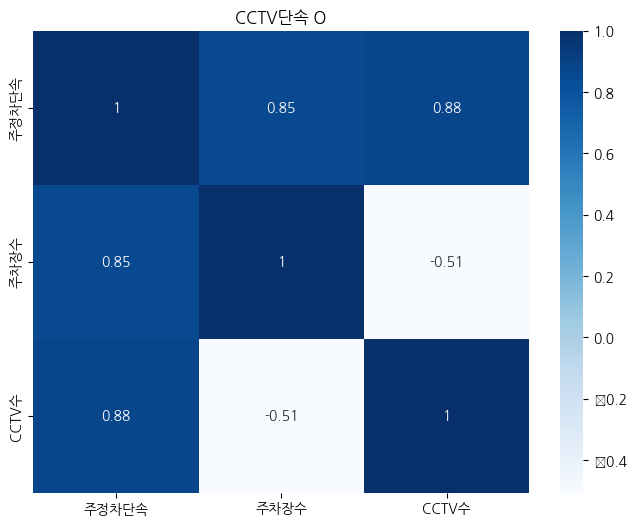

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt # 주정차단속수, 주차장수, CCTV수의 상관관계


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='Blues')
plt.title('CCTV단속 O')
plt.show()

In [50]:
# 각 동별 주정차 단속 횟수 계산
excluded_types = ['CCTV', '고정형CCTV','주행형CCTV','버스장착형CCTV'] # CCTV방식의 단속방식을 제외한 나머지 단속방식의 '동명'별 단속내역 value_counts를 구하기 위함.
crackdown_counts2 = df_crackdown[~df_crackdown['단속구분'].isin(excluded_types)]['단속지역'].value_counts().head(10)

# 각 동별 주차장 수 계산
pp_counts = df_pp['동명'].value_counts()

# 각 지역별 CCTV 수 계산
cctv_counts = df_CCTV['고정형CCTV지번주소'].value_counts()

# 데이터프레임 생성
df_analysis = pd.DataFrame({'주정차단속': crackdown_counts, '주차장수': pp_counts, 'CCTV수': cctv_counts})

# 상관관계 계산
correlation_matrix1 = df_analysis.corr()

# 결과 출력
print("상관관계:")
print(correlation_matrix1)

상관관계:
          주정차단속      주차장수     CCTV수
주정차단속  1.000000  0.858898  0.776679
주차장수   0.858898  1.000000 -0.507093
CCTV수  0.776679 -0.507093  1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


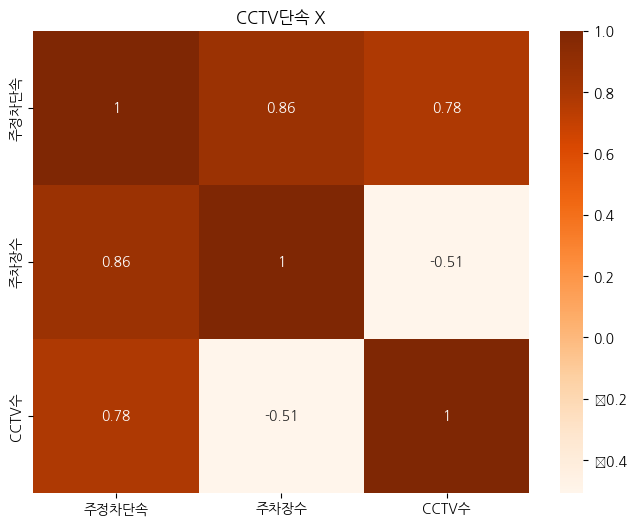

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt # 주정차단속수, 주차장수, CCTV수의 상관관계(CCTV단속 미포함)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='Oranges')
plt.title('CCTV단속 X')
plt.show()

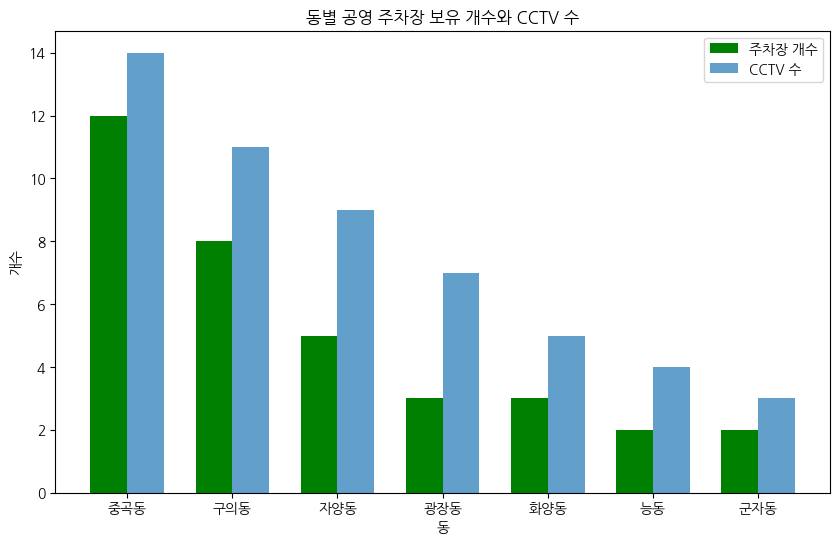

In [67]:
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))

# 동별 공영 주차장 보유 개수
pp_dong_values = pp_dong.values
cctv_counts_values = cctv_counts.values

bar_width = 0.35
index = np.arange(len(pp_dong))

# 주차장 개수 막대 그래프
ax.bar(index, pp_dong_values, bar_width, color='green', label='주차장 개수')

# CCTV 수 막대 그래프
ax.bar(index + bar_width, cctv_counts_values, bar_width, alpha=0.7, label='CCTV 수')

# 축 레이블 및 제목 설정
ax.set_xlabel('동')
ax.set_ylabel('개수')
ax.set_title('동별 공영 주차장 보유 개수와 CCTV 수')

# X축 눈금 레이블 및 범례 설정
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pp_dong.index)
ax.legend()

plt.show()